Notebook elaborado para apresentar conceitos relacionados à modelagem de dados.
Criado para a disciplina Geofísica I da Universidade Federal de Uberlândia.
O uso e a reprodução são livres para fins educacionais, pede-se apenas a citação da fonte.

[![License: GPL v3](https://img.shields.io/badge/License-GPLv3-blue.svg)](https://www.gnu.org/licenses/gpl-3.0)

Prof. Dr. Emerson Rodrigo Almeida<br>
Universidade Federal de Uberlândia<br>
Instituto de Geografia - Curso de Geologia<br>
emerson.almeida@ufu.br<br>
<p>&nbsp;</p>
Última modificação: 21/11/2021

---
# Objetivos

* Entender o que são os dados observados e os dados preditos;
* Compreender conceitos relacionados à solução de um problema direto e de um problema inverso;
* Compreender o processo de estimativa de parâmetros de um modelo de forma interativa;
* Verificar a influência da ambiguidade na modelagem dos dados geofísicos.

*Não se preocupe em compreender o código em si, não é obrigatório que você conheça a programação para obter e interpretar os resultados da demonstração. Mesmo assim, sinta-se livre caso queira perguntar qualquer coisa para aprender mais sobre o código e sua elaboração.*

---
## Antes de começar

* **Leia as instruções** apresentadas no texto para compreender a demonstração;
* **Não altere nada** no código apresentado na célula, a menos que o texto do notebook indique o contrário. Algumas modificações podem causar problemas na execução do código;
* A execução do código em uma célula é feito clicando-se *dentro* dela para ativá-la (você verá um contorno ao redor da célula e o cursor de texto piscando). Em seguida clique em uma das opções de menu ou de botão como mostrado na figura abaixo. É possível executá-las também pressionando as teclas **SHIFT+ENTER** simultanemante no seu teclado;

<center><img src="imgs/run.png" width=900 height=278/></center>

* O símbolo **[   ]:** próximo ao canto superior esquerdo de cada célula indica o estado de execução da célula. Quando ele está vazio a célula ainda não foi executada. Ao iniciar a execução, um asterisco ($*$) irá aparecer dentro dos colchetes. A execução é concluída sem problemas quando o $*$ dentro dos colchetes for substituído por um número e nenhuma mensagem de erro aparecer abaixo da célula executada;
* As células podem ser executadas repetidas vezes, porém é recomendável que sejam executadas **uma por vez e na ordem em que aparecem no notebook** para evitar erros de execução;
* As suas modificações **não serão salvas**. Caso você faça alguma alteração que cause o mal funcionamento do código e não consiga desfazê-la, basta atualizar a página do notebook.

**Execute a célula de código abaixo para carregar o módulo com os códigos que serão utilizados neste notebook.**

In [1]:
import modulos.ambiguidade as amb

---
---

### 01 - Problema direto e Dados Preditos

Considere o exemplo de um corpo em queda livre a partir de uma posição de repouso e desconsiderando o efeito da resistência do ar, em que a cada intervalo de $\Delta t$ segundos é anotada a posição deste corpo em relação à sua posição inicial em diferentes instantes de tempo. A posição do corpo ($s$, em m) a cada instante de tempo ($t$, em s) pode ser descrita em função da posição inicial ($s_i$, em m), da velocidade inicial ($v_i$, em m/s) e da aceleração ($a$, em m/s$^2$) com que o corpo cai utilizando-se a equação do movimento uniformemente acelerado:

$$ s = s_i + v_i * t + 0.5 * a * t^2 $$

Esta equação define matematicamente o comportamento de queda do corpo considerando os princípios físicos envolvidos no fenômeno. O cálculo da posição ($s$) do corpo corresponde, portanto, à solução do seu **problema direto** e os diferentes instantes de tempo ($t$) considerados correspondem ao **domínio** em que o problema é abordado. Quando você calcula as posições para uma série de instantes de tempos consecutivos o que você faz é **modelar** o comportamento de queda do corpo. Neste contexto, a posição inicial ($s_i$), a velocidade inicial ($v_i$) e a aceleração (a) correspondem aos **parâmetros do modelo**, e o conjunto de posições que você obtém corresponde ao conjunto de **dados preditos** ($d_{pred}$).

**Prática:** Considere o experimento de corpos em queda livre supostamente feito por Galileu na torre inclinada de Pisa, na Itália, em que dois corpos teriam sido soltos da posição de repouso no alto da torre, tocando o solo ao mesmo tempo e comprovando que o tempo necessário para o trajeto independe da massa dos corpos. Considerando uma altura de 57 m para a torre e uma aproximação de 9.8 m/s${^2}$ para a aceleração da gravidade obtenha os dados preditos para a posição dos corpos a cada 0.5 s. Elabore um gráfico da posição em função do tempo com estes dados.

### 02 - Dados Observados e o Problema Inverso

Os dados observados correspondem à informação coletada durante a observação de um fenômeno, ou seja, corresponde à informação medida em campo. Na situação considerada acima o conjunto de dados observados corresponderia a todas as posições do corpo registrradas durante a observação da sua queda. A partir do conjunto de dados observados é possível **estimar os parâmetros** do modelo, desde que se conheça a descrição matemática que governa o fenômeno. A forma mais simples de se fazer isso é reorganizando os termos da equação apresentada no Passo 01, isolando a aceleração $a$ do lado esquerdo e calculando-a a partir de um tempo $t$ em que a posição do corpo foi observada. Assim:

$$a = \frac{s - s_i - v_i*t}{0.5 * t^2}$$

Considerando que o corpo partiu da posição de repouso, i.e., com $v_i$ = 0, na posição inicial $s_i$ = 0, a equação fica simplicada como:

$$a = \frac{s}{0.5 * t^2}$$

Ao pensar desta maneira você intuitivamente considera o **problema inverso**, onde você tenta estimar um parâmetro ($a$) a partir de um conjunto de dados observados ($s$) no domínio do problema ($t$).

**Prática:** Calcule o valor da aceleração do corpo para cada posição obtida no Passo 01, obtendo assim uma estimativa para a aceleração da gravidade.

### 03 - Problemas mais complexos

A abordagem apresentada no Passo 02 pode ser utilizada apenas para solucionar problemas mais simples. Note que dois parâmetros ($v_i$ e $s_i$) foram considerados conhecidos e iguais a zero. Se estes parâmetros forem desconhecidos será necessário estimá-los também, e para isto será necessário resolver um sistema de equações lineares através de um procedimento ligeiramente mais complexo. Há ainda uma outra forma de abordar o problema, que é utilizando dados preditos e comparando-os com os dados observados. A comparação pode ser quantificada matematicamente de diferentes formas, através das quais o **erro de ajuste** pode ser avaliado, dependendo da abordagem do problema. Uma delas é usando o cálculo do erro RMS (root mean square), dado por:

$$ ERR = \sqrt{\frac{\sum_{i=1}^{N}(do_{i} - dp_{i})^2}{N}} $$

ou, percentualmente, por:

$$ ERR(\%) = \sqrt{\frac{\sum_{i=1}^{N}(\frac{do_{i} - dp_{i}}{do_{i}})^2}{N}} * 100 $$

onde $dp$ são os dados preditos e $do$ são os dados observados.

**Prática:** Ao executar a célula abaixo você verá um gráfico representando um conjunto de dados observados e um conjunto de dados preditos. O gráfico também lhe dará o cálculo do erro RMS atribuído à comparação entre ambos. Modifique os *valores numéricos* atribuídos a cada parâmetro, executando a célula em seguida, e repita este procedimento sucessivamente para estimar os valores dos parâmetros $s_i$, $v_i$ e $a$ da melhor forma possível -- i.e., buscando obter o menor erro de ajuste possível.

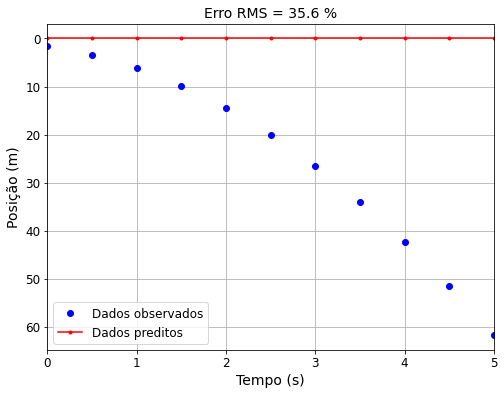

In [2]:
a = 0.0
vi = 0.0
si = 0.0

amb.executa_exercicio3(a, si, vi)   # não modifique nada nesta linha!

### 04 - Problemas não lineares

É bastante provável que você tenha conseguido encontrar os valores corretos, que são aqueles que fornecem um erro RMS igual a 0.0%. Isto ocorre porque o problema proposto é considerado uma situação matematicamente favorável por ser um **problema linear** e **bem posto**, ou seja, os dados têm uma dependência linear dos parâmetros, o problema admite uma solução e esta solução é única. Entretanto, em Geofísica os problemas raramente podem ser considerados lineares e/ou bem-postos, o que torna sua abordagem muito mais complexa.

Considere agora um conjunto de dados observados em um problema geofísico. Vamos usar a formulação de problema direto de um método geofísico real, porém o que nos interessa aqui é o conceito relacionado à **ambiguidade** que ocorre na modelagem e interpretação de um dado e não o método em si (você o verá em detalhes mais adiante no curso). Então, vamos supor que trata-se de um método geofísico genérico que chamaremos de QLQR que permite obter dados em função da densidade de um corpo geológico, da densidade da rocha ao redor deste corpo, da profundidade do corpo e do seu tamanho. A grandeza física medida é dada hipoteticamente em Unidades Geofísicas (UG).

Neste problema os parâmetros do modelo são a densidade do corpo rochoso ($rho\_c$, em g/cm$^3$), a densidade da rocha encaixante ($rho\_re$, em g/cm$^3$), a profundidade ($z$, em m) do centro deste corpo e o raio ($r$, em m) aproximado deste corpo (considere-o com geometria esférica). Os dados são adquiridos no domínio espacial, portanto cada ponto de dado é medido em uma posição ($x$, em m) diferente e a intervalos de distância regulares.

**Prática:** Ao executar a célula abaixo você verá um gráfico representando um conjunto de dados observados e um conjunto de dados preditos, assim como no exercício anterior, e o cálculo do erro RMS atribuído à comparação entre ambos. Modifique os *valores numéricos* atribuídos a cada parâmetro, executando a célula em seguida, e repita este procedimento sucessivamente para estimar os valores dos parâmetros $rho\_c$, $rho\_re$, $z$ e $r$ buscando obter o menor erro de ajuste possível. Anote os valores que você estimou para os parâmetros e compare seu resultado com o resultado dos seus colegas (não copie o resultado, a ideia é justamente fazer a comparação dos modelos que vocês conseguiram!).

Obs.: É necessário que $z \geq r$ devido a considerações adotadas no cálculo.

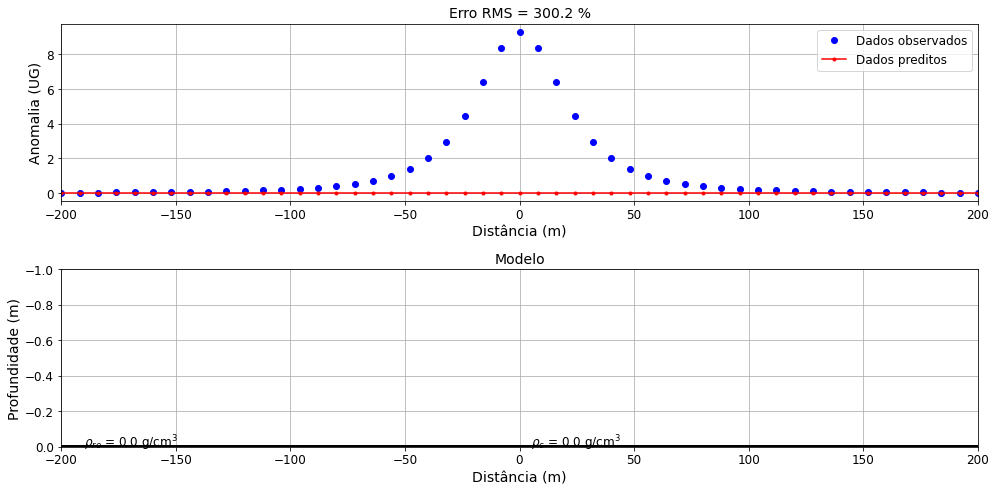

In [3]:
rho_c = 0.0
rho_re = 0.0
z = 0.0
r = 0.0

amb.executa_exercicio4(rho_c, rho_re, z, r)      # não modifique esta linha!